# Setting Up the Lib

In [1]:
# python >= 3.5 is required
import sys
assert sys.version_info >= (3, 5)

# scikit-learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# common imports
import numpy as np
import os
import pandas as pd

# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

# where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "specimen_ismail"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout = True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure: ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



# Getting the Data

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd
# Loading housing data
def load_housing_data(housing_path= HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.shape

(20640, 10)

In [7]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['total_bedrooms'].isna().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

<AxesSubplot:>

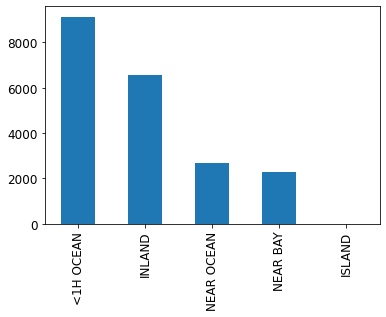

In [10]:
housing['ocean_proximity'].value_counts().plot(kind='bar')

In [11]:
# describe method provides summary of numerial attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


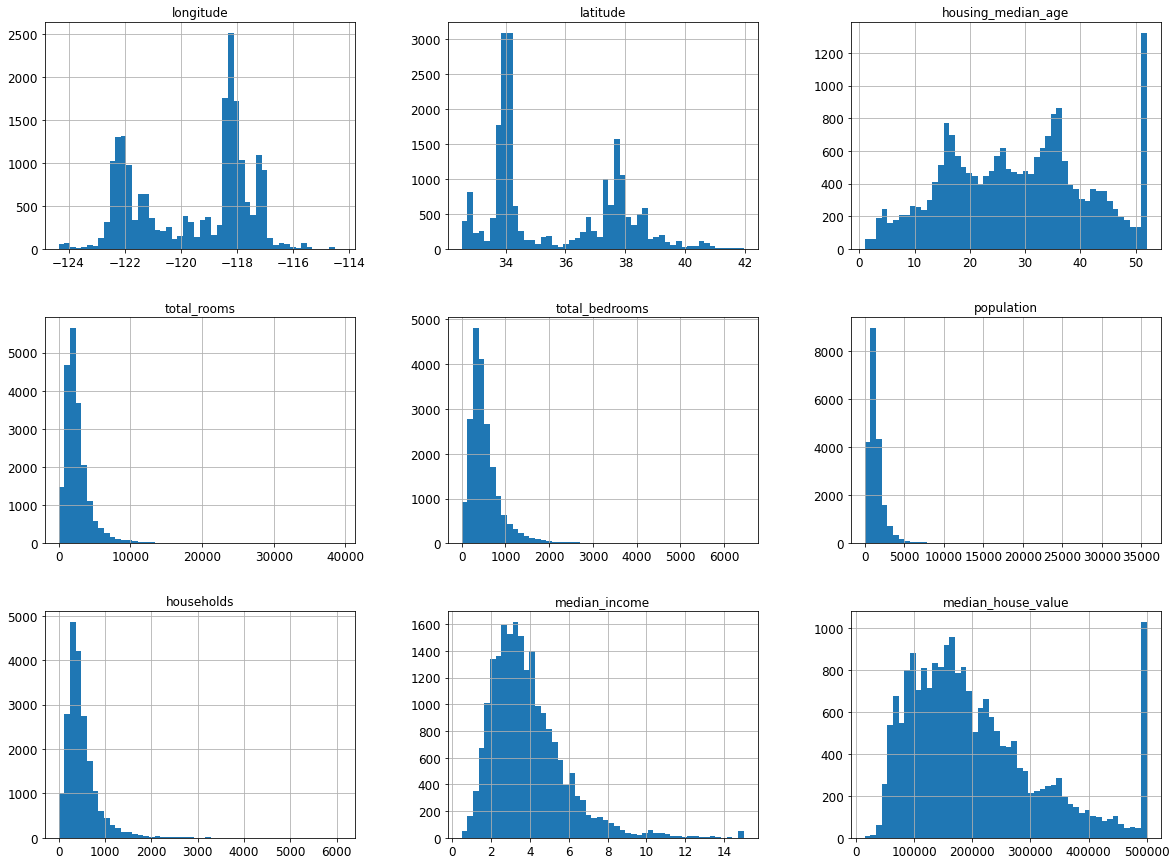

In [12]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Splitting Train and Test set 

#### Random permutation to split train and test set 

In [13]:
np.random.seed(42)

In [14]:
shuffled = np.random.permutation(len(housing))
print(len(shuffled))
shuffled

20640


array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [15]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
df = pd.DataFrame(np.arange(24))

In [17]:
train = split_train_test(df, .20)[0]

In [18]:
test = split_train_test(df, .20)[1]

In [19]:
train.shape, test.shape

((20, 1), (4, 1))

In [20]:
train_set, test_set = split_train_test(housing, 0.2)

In [21]:
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

#### Use hash to keep test set constant 

In [22]:
# test

from zlib import crc32

s = b'I love python'
t = crc32(s)
t

2523294012

In [23]:
def f_chk(bval, cval):
    return(bval +cval)% 256

In [24]:
f_chk(722, 0)

210

In [25]:
def checksum(data):
    return crc32(data) & 0xffffffff

In [26]:
checksum(np.int64(1))

2844319735

In [27]:
checksum(np.int64(2))

654825492

In [28]:
2 ** 32

4294967296

In [29]:
# We could compute a hash of each instance's identifier and put that instance in the test set
# if the hash is lower or equal to 20% of the maximum hash value.

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
    
    

In [30]:
# As housing data does not have any index, we could create an index coloumn

housing_with_id = housing.reset_index()
train_set_with_id, test_set_with_id = split_train_test_by_id(housing_with_id, 0.2, "index")

In [31]:
train_set_with_id.shape, test_set_with_id.shape

((16512, 11), (4128, 11))

In [32]:
# However, with an index added, we need to make sure the new data gets appended to the
# end of the dataset and no rows get deleted. 
# The other way around is to make distinct id based on one/ two features of the data

housing_with_id["id"] = housing["longitude"] * 100 + housing["latitude"]

In [33]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-12185.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-12184.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-12186.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-12187.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-12187.15


In [34]:
housing_with_id.drop("index", axis = 1, inplace = True)

In [35]:
housing_with_id

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-12185.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-12184.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-12186.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-12187.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-12187.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-12069.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-12081.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-12082.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-12092.57


In [36]:
train_set_id, test_set_id = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [37]:
train_set_id.shape, test_set_id.shape

((16406, 11), (4234, 11))

#### Split the data based on most important feature, so that the test set has the exact distribution 

<AxesSubplot:>

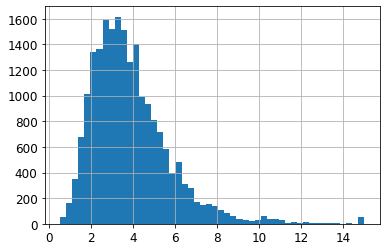

In [38]:
housing_with_id['median_income'].hist(bins = 50)

In [39]:
housing_with_id['income_cat'] = pd.cut(housing_with_id['median_income'], bins = [0., 1.5, 3.0, 4.5,
                                            6., np.inf], labels = [1, 2, 3, 4, 5])

<AxesSubplot:>

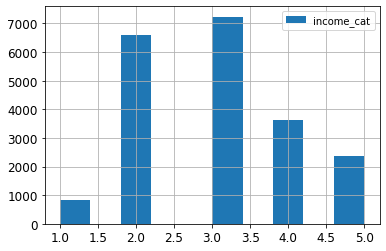

In [40]:
housing_with_id['income_cat'].hist(legend=True)

In [41]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [42]:
housing['income_cat'] = pd.cut(housing['median_income'], bins= [0., 1.5, 3., 4.5, 6., np.inf],
                              labels= [1, 2, 3, 4, 5])

In [43]:
housing['income_cat'].value_counts(sort=True, ascending=True)/ len(housing)

1    0.039826
5    0.114438
4    0.176308
2    0.318847
3    0.350581
Name: income_cat, dtype: float64

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

# split returns a stratifiedshufflesplit object with two methods.
split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [45]:
strat_test_set['income_cat'].value_counts(ascending=True) / len(strat_test_set), housing['income_cat'].value_counts(sort=True, ascending=True)/ len(housing)

(1    0.039729
 5    0.114583
 4    0.176357
 2    0.318798
 3    0.350533
 Name: income_cat, dtype: float64,
 1    0.039826
 5    0.114438
 4    0.176308
 2    0.318847
 3    0.350581
 Name: income_cat, dtype: float64)

From above we can see the test set income_cat has almost equal distribution. Now we should remove the extra column to return to the original data


In [46]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [47]:
strat_train_set.shape, strat_test_set.shape

((16512, 10), (4128, 10))

## Exploring the Data

In [48]:
# We make a copy of the train set to explore the data

housing = strat_train_set.copy()


In [49]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

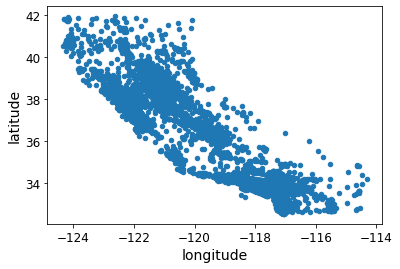

In [50]:
housing.plot(kind="scatter", x = 'longitude', y = 'latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

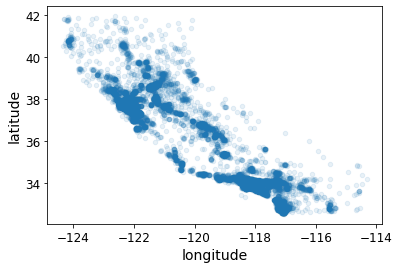

In [51]:
# adding alpha level allow us to see the density of the data point

housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

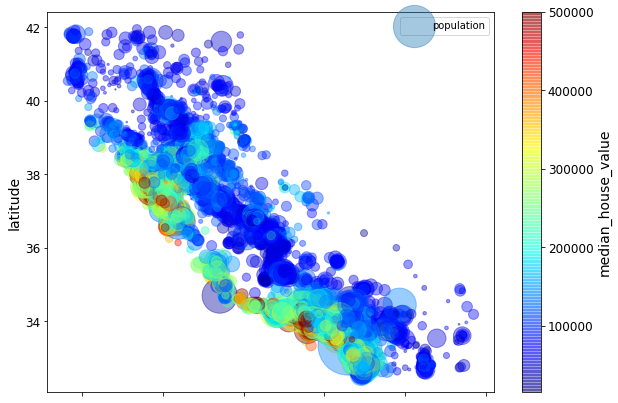

In [52]:
# Housing price in relation to location and population. Population is the circle radius
# the color depicts the price

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/10, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [53]:
# Calculte the correlation coefficient (Pearson's r)
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

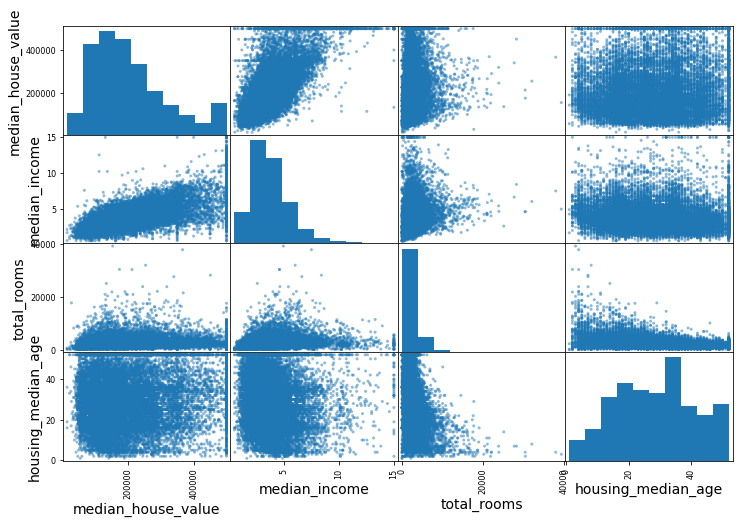

In [54]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income','total_rooms', "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

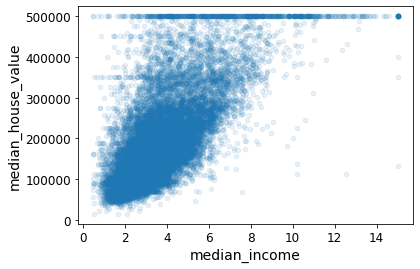

In [55]:
housing.plot(kind='scatter', x='median_income', y = 'median_house_value',
            alpha=0.1)

#### Creating new meaningful features by combining attributes 

In [56]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [57]:
# rooms per household = total_rooms / households
housing['rooms_per_household'] = housing['total_rooms']/ housing['households']

# bedrooms per room = total_bedrooms/ total_rooms
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

# population per household = population / households
housing['population_per_household'] = housing['population'] / housing['households']

In [58]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='rooms_per_household'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='rooms_per_household'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='rooms_per_household', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='bedrooms_per_room'>,
        <AxesSubplot:xlabel='population_per_household', ylabel='bedrooms_per_room'>],
       [<AxesSubplo

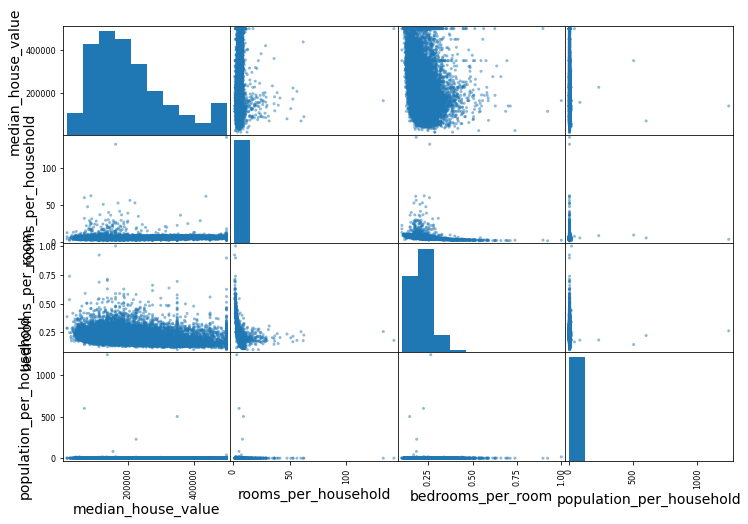

In [59]:
attributes = ['median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

scatter_matrix(housing[attributes], figsize=(12,8))

In [60]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learning Algorithm 

In [61]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [62]:
housing.shape, housing_labels.shape

((16512, 9), (16512,))

In [63]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### Handling missing values


In [64]:
# Three options:
# 1. Get rid of the corresponding rows
## housing.dropna(subset='total_bedrooms')

# 2. Get rid of the whole column
## housing.drop('total_bedrooms', axis=1)

# 3. Set the values to some value (zero, mean, median)
## median = housing['total_bedrooms'].median()
## housing['total_bedrooms'].fillna(median, inplace=True)

In [65]:
# Scikit learn class: SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Since median can be computed on numerical attributes, we need to create a copy of the data
# without the text attributes
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
len(imputer.statistics_), imputer.statistics_


(8,
 array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
         408.    ,    3.5409]))

In [66]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [67]:
X = imputer.transform(housing_num)

In [68]:
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [69]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [70]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [71]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


### Dealing with Categorial Attributes

In [72]:
housing_cat = housing[['ocean_proximity']]

In [73]:
housing_cat.shape

(16512, 1)

In [74]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# one demerit of the Ordinal Encoder is it takes the classes/ categories to numerical value


In [75]:
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [76]:
type(housing_cat_encoded)

numpy.ndarray

In [77]:
# One Hot Encoding provides a binary attribute

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [78]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [79]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN


#### Custom Transformer Class

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedroom_ix, population_ix, household_ix = 3, 4, 5 ,6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, room_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
     

In [81]:
attr_addr = CombinedAttributeAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_addr.transform(housing.values)

In [82]:
housing_extra_attribs[0]

array([-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
       '<1H OCEAN', 4.625368731563422, 2.094395280235988], dtype=object)

In [83]:
housing.values

array([[-121.89, 37.29, 38.0, ..., 339.0, 2.7042, '<1H OCEAN'],
       [-121.93, 37.05, 14.0, ..., 113.0, 6.4214, '<1H OCEAN'],
       [-117.2, 32.77, 31.0, ..., 462.0, 2.8621, 'NEAR OCEAN'],
       ...,
       [-116.4, 34.09, 9.0, ..., 765.0, 3.2723, 'INLAND'],
       [-118.01, 33.82, 31.0, ..., 356.0, 4.0625, '<1H OCEAN'],
       [-122.45, 37.77, 52.0, ..., 639.0, 3.575, 'NEAR BAY']],
      dtype=object)

In [84]:
sklearn.__version__

'0.23.2'

#### Pipeline 

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [86]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])


In [87]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [88]:
housing_num_tr.shape

(16512, 11)

In [89]:
list(housing)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

#### Combinig both numeric and categorical data

In [156]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_atribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs), # tuple consists of name, transformer and list of columns
    ('cat', OneHotEncoder(), cat_atribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [157]:
housing_prepared.shape

(16512, 16)

In [92]:
housing_labels


17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

## Select and Train Model

#### Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [95]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [96]:
print('Predictions: ', lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [97]:
print("labels: ", list(some_labels))

labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [98]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

#### Decision Tree Regressor

In [99]:
# Model with Decision Tree

In [100]:
from sklearn.tree import DecisionTreeRegressor 

In [101]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [102]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluate using Cross-Validation

In [103]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_mse_scores = np.sqrt(-scores)

In [112]:
def display_scores(scores):
    print("Score: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [113]:
display_scores(tree_mse_scores)

Score:  [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean:  70666.74616904806
Standard deviation:  2928.322738055112


In [114]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Score:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.6740017983493


#### Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [120]:
# Prediction on the training set
forest_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18680.294240259147

In [121]:
# Prediction with cross validation
forest_scores = cross_val_score(forest_reg, housing_prepared, 
                            housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [115]:
display_scores(forest_rmse_scores)

Score:  [49557.6095063  47584.54435547 49605.349788   52325.13724488
 49586.9889247  53154.87424699 48800.48987508 47880.32844243
 52958.68645964 50046.17489414]
Mean:  50150.018373763225
Standard deviation:  1902.0697041387534


## Saving Model

In [129]:
import joblib


In [130]:
joblib.dump(forest_reg, 'forest_reg.pkl')

['forest_reg.pkl']

In [131]:
forest_model_loaded = joblib.load('forest_reg.pkl')

In [132]:
pred = forest_model_loaded.predict(housing_prepared)

In [137]:
mse = mean_squared_error(housing_labels, pred)
rmse = np.sqrt(mse)
rmse

18680.294240259147

# Fine Tune Your Model

### Use Grid Search

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [140]:
forest_reg = RandomForestRegressor()

In [144]:
grid_search = GridSearchCV(forest_reg, param_grid, scoring='neg_mean_squared_error', cv=5,
                          return_train_score=True, verbose=3)

In [146]:
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=(train=-1065417649.991, test=-3864131255.555), total=   0.1s
[CV] max_features=2, n_estimators=3 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_features=2, n_estimators=3, score=(train=-1105558047.217, test=-4215342768.840), total=   0.1s
[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=(train=-1027750121.836, test=-4086734994.417), total=   0.1s
[CV] max_features=2, n_estimators=3 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  max_features=2, n_estimators=3, score=(train=-1081250704.144, test=-4089164237.907), total=   0.1s
[CV] max_features=2, n_estimators=3 ..................................
[CV]  max_features=2, n_estimators=3, score=(train=-1056261664.275, test=-3885607281.109), total=   0.1s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=(train=-568727395.813, test=-2748138430.812), total=   0.2s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=(train=-606105542.695, test=-3254285042.912), total=   0.2s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=(train=-580009970.463, test=-3301464308.770), total=   0.2s
[CV] max_features=2, n_estimators=10 .................................
[CV]  max_features=2, n_estimators=10, score=(train=-588516677.220, test=-2948411922.525), total=   0.2s
[CV] max_featur

[CV]  max_features=8, n_estimators=10, score=(train=-500485582.926, test=-2591911776.996), total=   0.6s
[CV] max_features=8, n_estimators=10 .................................
[CV]  max_features=8, n_estimators=10, score=(train=-503861247.588, test=-2802386968.102), total=   0.8s
[CV] max_features=8, n_estimators=10 .................................
[CV]  max_features=8, n_estimators=10, score=(train=-489028585.614, test=-2802875719.409), total=   1.1s
[CV] max_features=8, n_estimators=10 .................................
[CV]  max_features=8, n_estimators=10, score=(train=-496138904.284, test=-2593275130.808), total=   0.7s
[CV] max_features=8, n_estimators=10 .................................
[CV]  max_features=8, n_estimators=10, score=(train=-491476091.646, test=-2892836856.525), total=   0.7s
[CV] max_features=8, n_estimators=30 .................................
[CV]  max_features=8, n_estimators=30, score=(train=-387962592.147, test=-2300111871.272), total=   2.7s
[CV] max_featur

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   58.0s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [147]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [148]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [149]:
grid_search.best_score_

-2467083996.519393

In [152]:
cvres = grid_search.cv_results_
for mean_score, param in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), param)

63468.07156016055 {'max_features': 2, 'n_estimators': 3}
55562.025774661146 {'max_features': 2, 'n_estimators': 10}
52936.56894825157 {'max_features': 2, 'n_estimators': 30}
60356.61634837451 {'max_features': 4, 'n_estimators': 3}
53214.70871826818 {'max_features': 4, 'n_estimators': 10}
50398.49203603644 {'max_features': 4, 'n_estimators': 30}
59180.18106191842 {'max_features': 6, 'n_estimators': 3}
52501.94052221968 {'max_features': 6, 'n_estimators': 10}
50138.91719794811 {'max_features': 6, 'n_estimators': 30}
57659.2821403165 {'max_features': 8, 'n_estimators': 3}
52313.0699765177 {'max_features': 8, 'n_estimators': 10}
49669.74931001155 {'max_features': 8, 'n_estimators': 30}
62766.60315667721 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54257.7629448856 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60304.69021845717 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52476.33218381887 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


### Analyze the best models and their errors

In [153]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [154]:
feature_importance

array([6.86176465e-02, 5.93724594e-02, 4.43613115e-02, 1.51049740e-02,
       1.53650845e-02, 1.48715517e-02, 1.48252499e-02, 3.95098290e-01,
       4.10430357e-02, 1.15939883e-01, 4.21184553e-02, 4.41744828e-03,
       1.64597996e-01, 6.83391688e-05, 1.51368856e-03, 2.68458579e-03])

In [163]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [164]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [165]:
sorted(zip(feature_importance, attributes), reverse=True)

[(0.3950982904882235, 'median_income'),
 (0.1645979961507494, 'INLAND'),
 (0.11593988291197116, 'pop_per_hhold'),
 (0.06861764653769088, 'longitude'),
 (0.059372459440997345, 'latitude'),
 (0.04436131148139608, 'housing_median_age'),
 (0.04211845531958239, 'bedrooms_per_room'),
 (0.04104303574729567, 'rooms_per_hhold'),
 (0.015365084473634657, 'total_bedrooms'),
 (0.015104974033622792, 'total_rooms'),
 (0.014871551697477671, 'population'),
 (0.014825249912355391, 'households'),
 (0.004417448282397587, '<1H OCEAN'),
 (0.0026845857936254654, 'NEAR OCEAN'),
 (0.001513688560201802, 'NEAR BAY'),
 (6.833916877826556e-05, 'ISLAND')]

# Evaluate on Test Set

In [166]:
final_model = grid_search.best_estimator_

In [169]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [170]:
X_test_prepared = full_pipeline.transform(X_test)

In [171]:
final_predictions = final_model.predict(X_test_prepared)

In [173]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47934.358239687426

#### Calculate Confidence Interval

In [174]:
from scipy import stats

In [175]:
confidence = 0.95
squared_errors = (final_predictions - y_test) **2

In [176]:
squared_errors

5241     7.732447e+07
10970    1.643224e+09
20351    3.684490e+07
6568     1.852442e+09
13285    6.402587e+08
             ...     
20519    6.916900e+08
17430    7.347714e+08
4019     2.083013e+09
12107    1.645925e+09
2398     3.749521e+09
Name: median_house_value, Length: 4128, dtype: float64

In [177]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45964.37892194, 49826.51171838])